# Notebook used for final analysis


## Forward Euler, using C0 from analytical solution

In [1]:
import numpy as np
import functions as f
import matplotlib.pyplot as plt

In [16]:
Nt_gaps = 10000    # number of timesteps
T = 60             # final time 

Nx_spaces = 1000;   # number of spaces in x
L1 = -10; # Distance behind 0 reference point
L2 = 25 # Distance in front  0 reference point
C0 = 8.71346e-3

In [17]:
Cf, U, x, t = f.forward_euler(Nt_gaps, Nx_spaces, L1, L2, C0=8.73e-3, T=60, D=0.1, v=0.2, b0=0, bL=0, x_heart=13)

Cf

0.0010071919689410274

Plot and export images for report

Time = 0

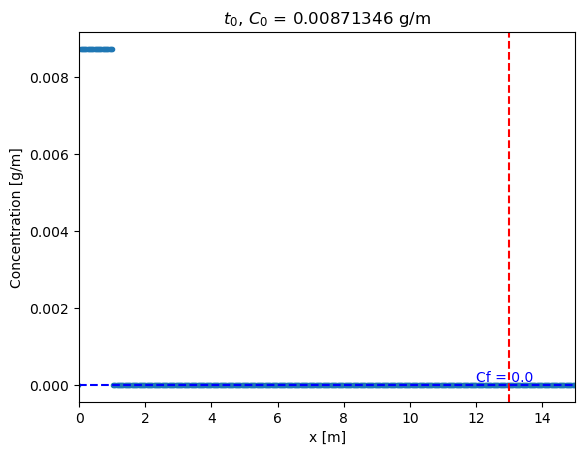

In [18]:
fig, ax = plt.subplots()
f.concentration_x_plot(x, U[:,0], C0, t_str='$t_{0}$', ax=ax)

plt.savefig("images/concetration_t0.eps", format="eps")

Time = end

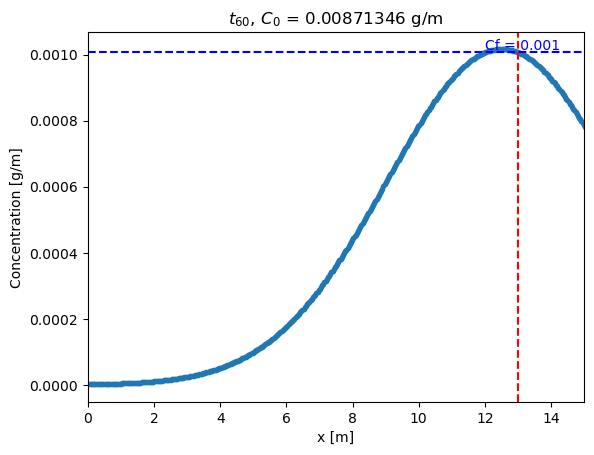

In [19]:
fig, ax = plt.subplots()
f.concentration_x_plot(x, U[:,-1], C0, t_str='$t_{60}$', ax=ax)

plt.savefig("images/concetration_t_end.eps", format="eps")

Plot many Time locations

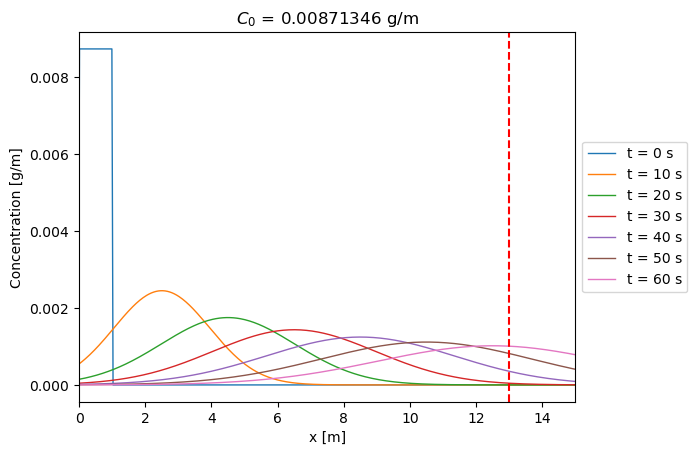

<Figure size 640x480 with 0 Axes>

In [20]:
delta_t = 10
t_to_plot = np.arange(0, 60 + delta_t, delta_t)

heart_loc = 13
index_closest = (np.abs(x - heart_loc)).argmin()
C_heart = U[index_closest,-1]


fig, ax = plt.subplots()
for tt in t_to_plot:
    index_closest = (np.abs(t - tt)).argmin()
    ax.plot(x, U[:, index_closest], '-', linewidth = 1, label=f't = {tt} s')
    
    # if tt == 60:
    #     ax.axhline(y=C_heart, color='b', linestyle='--', label= f'Cf = {round(C_heart, 4)}')
    #     ax.text(x=12, y=C_heart, s=f'Cf = {round(C_heart, 4)}', color='b', va='bottom', ha='left')
    
ax.set_xlabel('x [m]')
ax.set_ylabel('Concentration [g/m]')
ax.set_xlim([0,15])

# ax.legend() 
ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))

ax.axvline(x=heart_loc, color='r', linestyle='--')

title_str = f'$C_0$ = {C0} g/m'
ax.set_title(title_str)

plt.show()

plt.savefig("images/concentration_over_time.eps", format="eps")